In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('maryland_accident_dataset.csv')

In [3]:
# data type check
data.dtypes

CDL_FLAG                   object
CONDITION_CODE             object
EQUIP_PROB_CODE            object
FAULT_FLAG                 object
INJ_SEVER_CODE             object
PERSON_ID                  object
PERSON_TYPE                object
REPORT_NO                  object
SAF_EQUIP_CODE             object
SEX_CODE                   object
VEHICLE_ID                 object
COLLISION_TYPE_CODE        object
C_M_ZONE_FLAG              object
JUNCTION_CODE              object
LANE_CODE                  object
LIGHT_CODE                 object
RD_COND_CODE               object
RD_DIV_CODE                object
SURF_COND_CODE             object
WEATHER_CODE               object
AREA_DAMAGED_CODE_MAIN     object
BODY_TYPE_CODE             object
DAMAGE_CODE                object
HIT_AND_RUN_FLAG           object
MOVEMENT_CODE              object
TIME                       object
AGE                       float64
dtype: object

In [4]:
data.head()

,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,REPORT_NO,SAF_EQUIP_CODE,SEX_CODE,...,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
0,N,Apparently Normal,No Misuse,N,No Injury,a33f1d87-624c-4608-a11e-84d03ecd067a,D,AB36760008,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Functional,Y,Starting From Parked,2015-01-24 01:40:00,42.0
1,N,Apparently Normal,No Misuse,N,No Injury,a6c44772-fd8f-47d5-95ba-25c143766037,D,AC1022000M,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Dry,Clear,Six o'clock,(Sport) Utility Vehicle,Superficial,N,Moving Constant Speed,2015-03-30 16:19:00,53.0
2,N,Apparently Normal,No Misuse,N,No Injury,517a3a6f-3d0d-4cda-8e42-836efaf5f55d,D,AC2017000W,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13:00,44.0
3,N,Apparently Normal,No Misuse,N,Possible Incapacitating Injury,9dfe84cd-9dce-4aeb-9618-e11af38d88e1,D,AC2017000W,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13:00,48.0
4,N,Apparently Normal,No Misuse,Y,No Injury,72c93d16-1bd8-4503-8cbf-3f8fb40d19e3,D,ADF451000C,Shoulder/Lap Belt(s),F,...,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Superficial,N,Moving Constant Speed,2015-02-23 13:45:00,28.0


#### 각 변수가 가질 수 있는 값 확인

In [5]:
for col in data.columns:
    print(col)
    print(str(data[col].unique()) + '\n')

CDL_FLAG
['N' 'Y']

CONDITION_CODE
['Apparently Normal' 'Had Been Drinking'
 'Influenced by Medications and/or Drugs and/or Alcohol' 'Fatigued Fainted'
 'Using Drugs' 'Ill' 'Emotional Depressed Angry Disturbed'
 'Other Handicaps' 'Apparently Asleep' 'Physical Defects']

EQUIP_PROB_CODE
['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Belts/Anchors Broken' 'Not Strapped Right' 'Size/Type Improper'
 'Not Anchored Right' 'Anchor Not Secure']

FAULT_FLAG
['N' 'Y']

INJ_SEVER_CODE
['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']

PERSON_ID
['a33f1d87-624c-4608-a11e-84d03ecd067a'
 'a6c44772-fd8f-47d5-95ba-25c143766037'
 '517a3a6f-3d0d-4cda-8e42-836efaf5f55d' ...,
 '63529935-542d-4c69-af1f-1b3e49894090'
 '400dc255-6c26-4e47-9f75-920439556f0b'
 '6dbbc5b4-3922-4726-ae9f-d4140e986ea4']

PERSON_TYPE
['D']

REPORT_NO
['AB36760008' 'AC1022000M' 'AC2017000W' ..., 'ADI5630003' 'HM0146000D'
 'MCP1519000S']



#### AGE 범주형으로 변환

In [6]:
data.AGE = data.AGE.apply(lambda x : str(int(x / 10) * 10))

#### 시간 변수 전처리

In [7]:
data.TIME = pd.to_datetime(data.TIME)

In [8]:
hour = data.TIME.apply(lambda x : x.hour)
day = data.TIME.apply(lambda x: x.weekday_name)
time = []

for i in data.index:
    tmp_hour, tmp_day = hour[i], day[i]

    if tmp_day in ['Saturday', 'Sunday']:
        time.append('WEEKEND')
    elif tmp_hour in [7,8,9,16,17,18,19]:
        time.append('WEEKDAY_RUSH_HOUR')
    else:
        time.append('WEEKDAY_OFF_PEAK')
        
data['TIME'] = time

In [9]:
data.dtypes

CDL_FLAG                  object
CONDITION_CODE            object
EQUIP_PROB_CODE           object
FAULT_FLAG                object
INJ_SEVER_CODE            object
PERSON_ID                 object
PERSON_TYPE               object
REPORT_NO                 object
SAF_EQUIP_CODE            object
SEX_CODE                  object
VEHICLE_ID                object
COLLISION_TYPE_CODE       object
C_M_ZONE_FLAG             object
JUNCTION_CODE             object
LANE_CODE                 object
LIGHT_CODE                object
RD_COND_CODE              object
RD_DIV_CODE               object
SURF_COND_CODE            object
WEATHER_CODE              object
AREA_DAMAGED_CODE_MAIN    object
BODY_TYPE_CODE            object
DAMAGE_CODE               object
HIT_AND_RUN_FLAG          object
MOVEMENT_CODE             object
TIME                      object
AGE                       object
dtype: object

In [10]:
data.shape

(47400, 27)

## 사고의 유형 분석

### 사고를 (1)도로 특성, (2)날씨, (3)시간대 측면에서 유형화

#### 현재 데이터의 인스턴스는 '운전자'
#### (1) - (3)의 변수들을 바탕으로 사고 정보의 테이블을 생성

In [11]:
accident_data = data.drop_duplicates(subset='REPORT_NO')

In [12]:
accident_data.columns

Index(['CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE', 'FAULT_FLAG',
       'INJ_SEVER_CODE', 'PERSON_ID', 'PERSON_TYPE', 'REPORT_NO',
       'SAF_EQUIP_CODE', 'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE',
       'C_M_ZONE_FLAG', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE'],
      dtype='object')

In [13]:
accident_vars = ['REPORT_NO','LIGHT_CODE','JUNCTION_CODE',
                'SURF_COND_CODE','LANE_CODE','RD_COND_CODE',
                 'RD_DIV_CODE', 'WEATHER_CODE','C_M_ZONE_FLAG',
                 'TIME']

In [14]:
accident_data = accident_data[accident_vars].reset_index(drop=True)

In [15]:
accident_data.shape

(29593, 10)

#### 범주형 변수들을 더미 변수로 변경

In [16]:
report_no = accident_data.REPORT_NO
accident_data = pd.get_dummies(accident_data.drop('REPORT_NO', axis = 1), drop_first = True)
accident_data['REPORT_NO'] = report_no

In [17]:
accident_data.shape

(29593, 51)

### 클러스터링

In [18]:
from sklearn.cluster import KMeans

In [19]:
n_cluster= 5

In [20]:
kmeans = KMeans(n_clusters=n_cluster)

In [21]:
cluster_label = kmeans.fit_predict(accident_data.drop('REPORT_NO', axis=1))

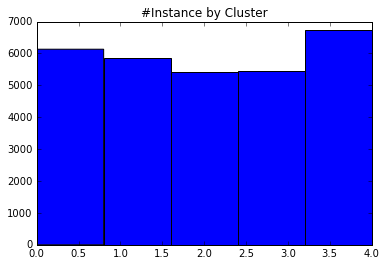

In [22]:
plt.hist(cluster_label, bins=n_cluster)
plt.title('#Instance by Cluster')

### 각 클러스터의 특징 추출

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import operator

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

In [25]:
dt = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes = n_cluster)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(accident_data.drop('REPORT_NO', axis=1),
                                                    cluster_label,test_size=0.3)

In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=5,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
print('Training Accuracy', accuracy_score(y_train,dt.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test,dt.predict(X_test)))

Training Accuracy 0.946319092445
Test Accuracy 0.947848614553


#### Graphviz 설치
Python에서 Decision Tree를 시각화하는 tool인 Graphviz를 사용하여 분류한 Decision Tree를 시각화 하고자 합니다.

http://www.graphviz.org/Download..php

위에 링크한 사이트에 접속하시고 각자 사용하시는 OS에 따라 파일을 다운받으시면 됩니다.(윈도우의 경우 .zip파일을 받으시면 됩니다)
zip파일의 압축을 해제하신 후에, [제어판 -> 시스템 및 보안 -> 시스템 -> (좌측) 고급 시스템 설정 -> 환경변수], 시스템 변수에서 'Path'라는 환경 변수에 Graphviz가 설치된 경로를 추가하면 됩니다.

** graphviz가 설치된 경로는 

내 PC 

-> C 드라이브(혹은 다른 드라이브)에서 Program Files(혹은 Program Files (x86))

-> graphviz-x.xx (x는 버전마다 다른 값을 가집니다.)

-> release

-> bin

위치 경로를 복사하여 환경변수에 추가하시면 됩니다. (폴더 상단의 path를 클릭하시면 경로값을 복사할 수 있습니다.)

예시)  C:\Program Files (x86)\graphviz-2.38\release\bin\

(@) 주의사항: 위치경로 복사한 후에 반드시 예시와 같이 맨뒤에 \(백슬래쉬)를 붙여주시기 바랍니다.

(@@) ppt에서 보신 Decision Tree는 graphviz에서 그려준 Decision Tree 결과를 바탕으로 이해하기 쉽도록 재구성한 그림입니다.

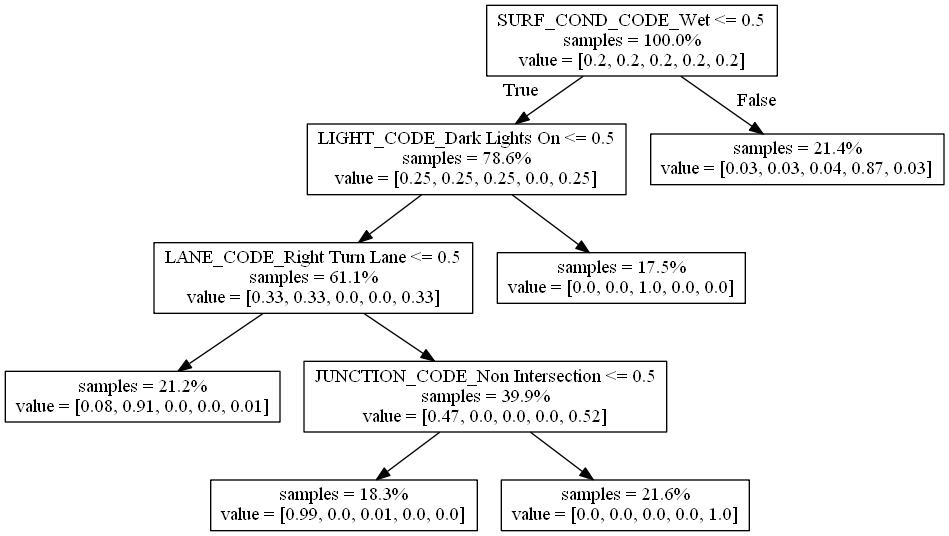

In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X_train.columns,\
               impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')

## 클러스터 레이블을 '사고의 유형'으로 정의

In [30]:
accident_type_lookup = pd.DataFrame()
accident_type_lookup['REPORT_NO'] = accident_data['REPORT_NO']
accident_type_lookup['ACCIDENT_TYPE'] = cluster_label

In [31]:
data = pd.merge(data, accident_type_lookup, how='left', on='REPORT_NO')

## 사고의 유형을 세분화

### 사고의 유형 별로, '과실 상황'을 유형화

#### 과실이 있는 운전자의, 사고 당시 주행 상황과 충돌 유형에 대한 변수

In [32]:
fault_vars = ['HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'BODY_TYPE_CODE', 'COLLISION_TYPE_CODE']

In [33]:
fault_drivers = data.loc[data.FAULT_FLAG == 'Y'].reset_index(drop=True)
fault_drivers = fault_drivers[fault_vars + ['REPORT_NO', 'ACCIDENT_TYPE']]

report_no = fault_drivers.REPORT_NO
accident_type = fault_drivers.ACCIDENT_TYPE

fault_drivers = pd.get_dummies(fault_drivers.drop('REPORT_NO',axis=1).drop('ACCIDENT_TYPE',axis=1))
fault_drivers['REPORT_NO'] = report_no
fault_drivers['ACCIDENT_TYPE'] = accident_type

#### 과실로 인해 발생한 피해에 대한 변수

In [34]:
accident_result_vars = ['DAMAGE_CODE', 'INJ_SEVER_CODE']

In [35]:
accident_results = data[accident_result_vars + ['REPORT_NO']]

report_no = accident_results.REPORT_NO

accident_results = pd.get_dummies(accident_results.drop('REPORT_NO',axis=1))
accident_results['REPORT_NO'] = report_no

accident_results = accident_results.groupby('REPORT_NO').agg('sum').reset_index()

In [36]:
fault_results = pd.merge(fault_drivers, accident_results, on = 'REPORT_NO', how = 'left')

In [37]:
results_vars = [col for col in fault_results.columns 
          if ('DAMAGE_CODE' in col) or ('INJ_SEVER_CODE') in col]

### 과실 상황의 유형화를 위해 클러스터링 수행

In [38]:
type0 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 0].reset_index(drop=True)
type1 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 1].reset_index(drop=True)
type2 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 2].reset_index(drop=True)
type3 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 3].reset_index(drop=True)
type4 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 4].reset_index(drop=True)

In [39]:
types = [type0,type1,type2,type3,type4]

#### 각 사고 유형 별, 과실 유형의 개수를 4개로 가정

In [40]:
n_clusters_type_detail = 4

In [41]:
km0 = KMeans(n_clusters=n_clusters_type_detail)
km1 = KMeans(n_clusters=n_clusters_type_detail)
km2 = KMeans(n_clusters=n_clusters_type_detail)
km3 = KMeans(n_clusters=n_clusters_type_detail)
km4 = KMeans(n_clusters=n_clusters_type_detail)

In [42]:
kms = [km0,km1,km2,km3,km4]

In [43]:
dt0 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt1 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt2 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt3 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt4 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)

In [44]:
dts = [dt0,dt1,dt2,dt3,dt4]

In [45]:
for i in range(0, n_cluster):
    
    print('Accident Type : ' + str(i))
    
    cluster_type_detail_label = kms[i].fit_predict(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                            drop('REPORT_NO',axis=1))   
    
    X_tr, X_te, y_tr, y_te = train_test_split(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                       drop('REPORT_NO',axis=1),
                                              cluster_type_detail_label,test_size = 0.2)
    dts[i].fit(X_tr, y_tr)

    types[i]['ACCIDENT_TYPE_DETAIL'] = cluster_type_detail_label

    print('Training Accuracy', accuracy_score(y_tr,dts[i].predict(X_tr)))
    print('Test Accuracy', accuracy_score(y_te,dts[i].predict(X_te)))

Accident Type : 0
Training Accuracy 0.97972972973
Test Accuracy 0.976091476091
Accident Type : 1
Training Accuracy 0.891083521445
Test Accuracy 0.869074492099
Accident Type : 2
Training Accuracy 0.92679028133
Test Accuracy 0.932311621967
Accident Type : 3
Training Accuracy 0.989898989899
Test Accuracy 0.983164983165
Accident Type : 4
Training Accuracy 0.996365398595
Test Accuracy 0.993217054264


### 대분류 0

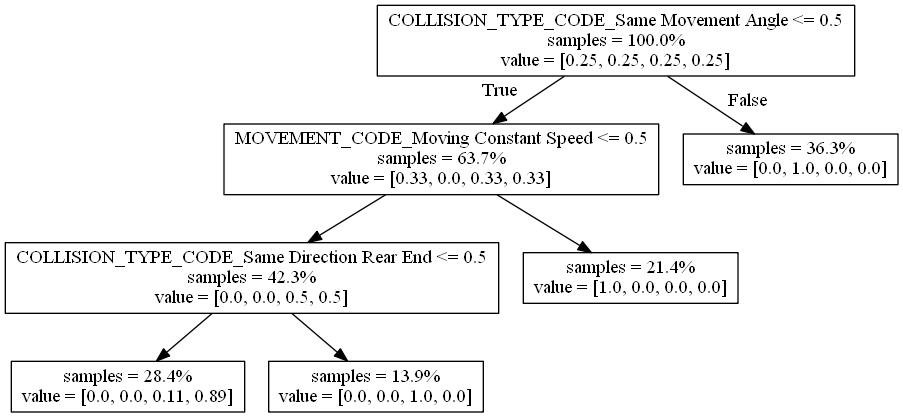

In [46]:
dot_data = StringIO()
export_graphviz(dts[0], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type0.jpeg')
Image(filename='tree_type0.jpeg')

### 대분류 1

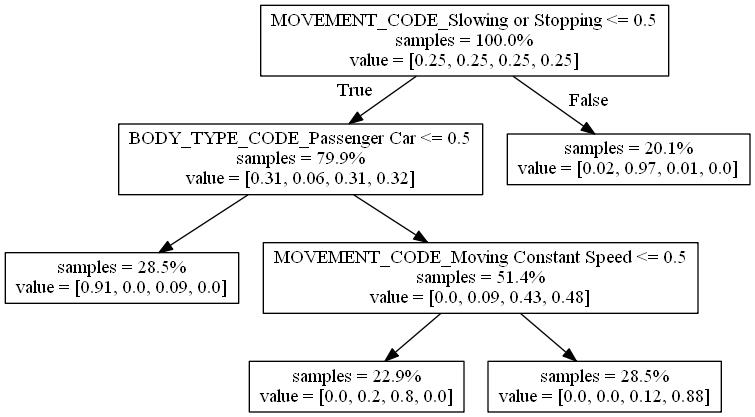

In [47]:
dot_data = StringIO()
export_graphviz(dts[1], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type1.jpeg')
Image(filename='tree_type1.jpeg')

### 대분류 2

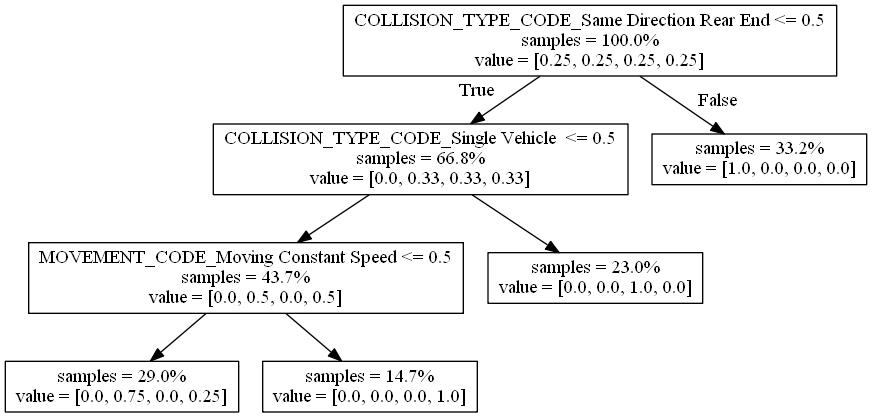

In [48]:
dot_data = StringIO()
export_graphviz(dts[2], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type2.jpeg')
Image(filename='tree_type2.jpeg')

### 대분류 3

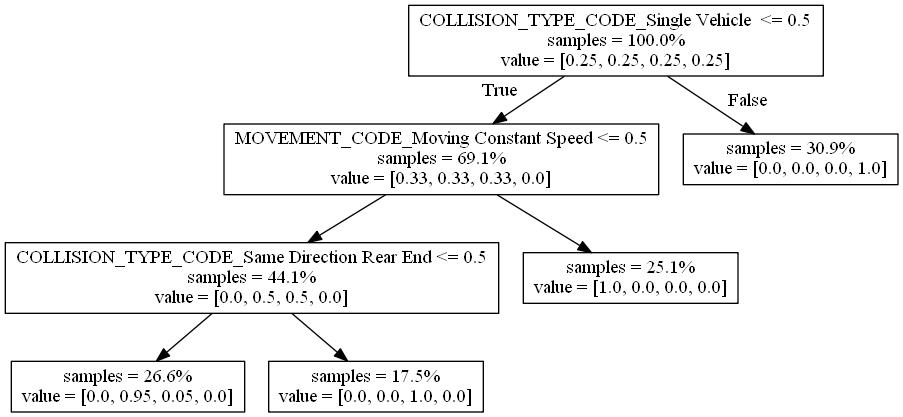

In [49]:
dot_data = StringIO()
export_graphviz(dts[3], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type3.jpeg')
Image(filename='tree_type3.jpeg')

### 대분류 4

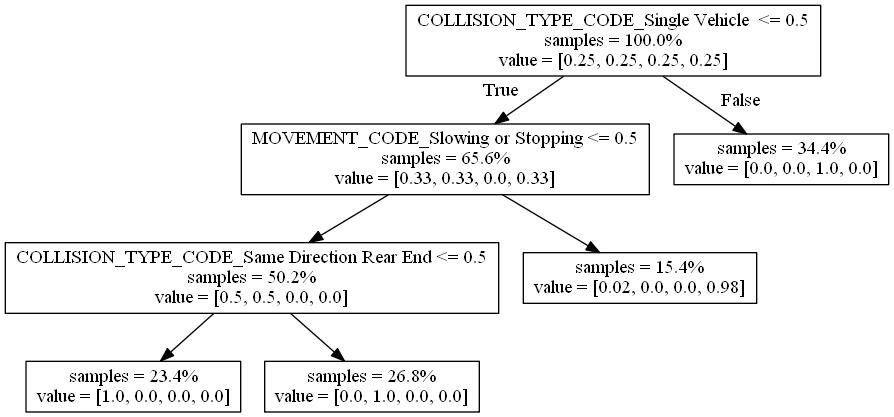

In [50]:
dot_data = StringIO()
export_graphviz(dts[4], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type4.jpeg')
Image(filename='tree_type4.jpeg')

### 과실 유형 별 피해 규모

In [51]:
final_data=type0.append(type1).append(type2).append(type3).append(type4).reset_index(drop=True)

In [52]:
final_data = pd.merge(final_data, accident_results, on = 'REPORT_NO', how = 'left')

In [53]:
final_data.groupby(['ACCIDENT_TYPE','ACCIDENT_TYPE_DETAIL']).agg('mean')[results_vars]

DAMAGE_CODE_Destroyed  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                          
0             0                                  0.118447   
              1                                  0.120867   
              2                                  0.044700   
              3                                  0.080451   
1             0                                  0.102215   
              1                                  0.035382   
              2                                  0.120448   
              3                                  0.106211   
2             0                                  0.085106   
              1                                  0.158145   
              2                                  0.141573   
              3                                  0.137731   
3             0                                  0.111702   
              1                                  0.095070   
              2                                  0.041162   
              3                                  0.131868   
4             0                                  0.130000   
              1                                  0.081991   
              2                                  0.166210   
              3                                  0.046753   

                                    DAMAGE_CODE_Disabling  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                          
0             0                                  0.826214   
              1                                  1.100912   
              2                                  0.484036   
              3                                  0.844730   
1             0                                  0.669506   
              1                                  0.700186   
              2                                  0.943044   
              3                                  0.855986   
2             0                                  0.807751   
              1                                  1.029727   
              2                                  0.620225   
              3                                  0.896991   
3             0                                  0.939716   
              1                                  1.012324   
              2                                  0.711864   
              3                                  0.668132   
4             0                                  0.773333   
              1                                  0.869693   
              2                                  0.616018   
              3                                  0.805195   

                                    DAMAGE_CODE_Functional  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                           
0             0                                   0.538835   
              1                                   0.491448   
              2                                   0.583653   
              3                                   0.401448   
1             0                                   0.540886   
              1                                   0.725326   
              2                                   0.493931   
              3                                   0.563456   
2             0                                   0.648176   
              1                                   0.482759   
              2                                   0.131461   
              3                                   0.436343   
3             0                                   0.587766   
              1                                   0.531690   
              2                                   0.676755   
              3                                   0.109158   
4             0                                   0.425000   
              1                                   0.698389   
              2                                   0.107515   
              3                                 

In [54]:
final_data.to_csv('accident_types_and_fatality.csv',index=False)

## 이후 시각화 자료에 대한 부가 설명
본 과정에서 마지막에 제공된 '분석 결과' ppt를 보시면 tree map이나 bar chart를 이용한 시각화 자료들을 보실 수 있습니다. 이 그래프들은 python이 아닌 'spotfire'라는 시각화 tool을 이용하여 구한 결과입니다.

http://spotfire.tibco.com/

위의 링크에서 spotfire에 대한 보다 자세한 정보를 살펴볼 수 있습니다.

'분석 결과' ppt에서 '치사도', '빈도X치사도'라는 수치는 spotfire에서 계산을 하였고, 그를 이용하여 각각의 그래프를 spotfire에서 시각화하였으니 참고하시길 바랍니다.